In [1]:
import pandas as pd
import numpy as np

In [5]:
data_path = "/Users/kang/Data/AMZN_2021-04-01_34200000_57600000_message_50.csv"
df = pd.read_csv(data_path)

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/651119611.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [11]:
new = df[df.iloc[:,1] == 4]

In [19]:
quantity = new.iloc[:,3]

In [21]:
quantity.to_csv("quantity.csv")

# read quantity

In [23]:
df = pd.read_csv("/Users/kang/Desktop/Volume-Tranformer/quantity.csv")
df.columns = ['index', 'value']

In [37]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -43.486298
p-value: 0.000000


/Users/kang/opt/anaconda3/envs/trade/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


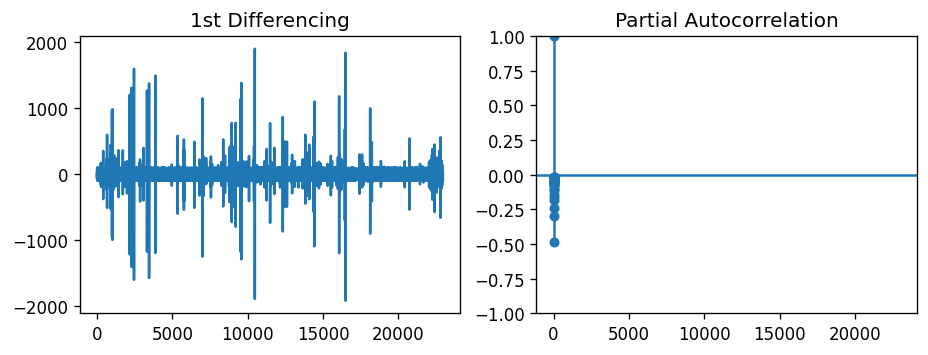

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), ax=axes[1])

plt.show()

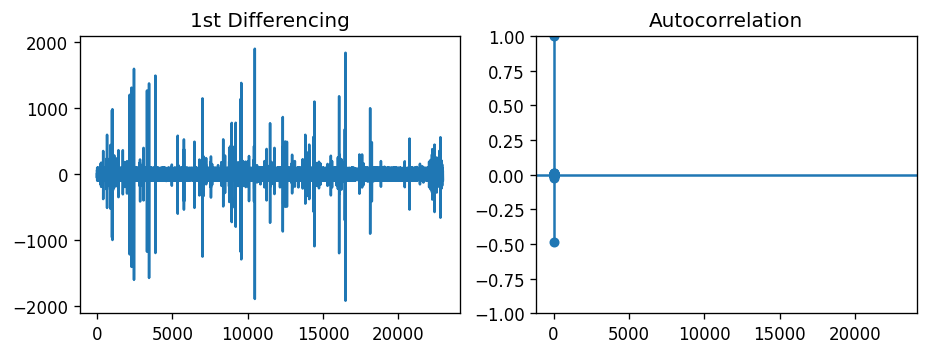

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

In [47]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=251839.646, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=250545.461, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=250871.392, Time=0.62 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=249914.166, Time=0.27 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=249649.973, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=249395.636, Time=0.23 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=249240.441, Time=0.48 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=249082.831, Time=0.64 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=248949.033, Time=0.79 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=248858.934, Time=0.89 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=248779.503, Time=0.99 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=248731.867, Time=1.15 sec
 ARIMA(10,0,1)(0,0,0)[0]             : AIC=inf, Time=11.95 sec
 ARIMA(9,0,1)(0,

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt 

In [85]:
df = pd.read_csv("/Users/kang/Desktop/Volume-Tranformer/quantity.csv")
df.columns = ['index', 'value']

In [83]:
# df.value = df.value.diff(1); df = df.dropna()
# df.value = df.value.diff(1); df.value = df.value.diff(1); df = df.dropna()

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/20384094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.value = df.value.diff(1); df.value = df.value.diff(1); df = df.dropna()


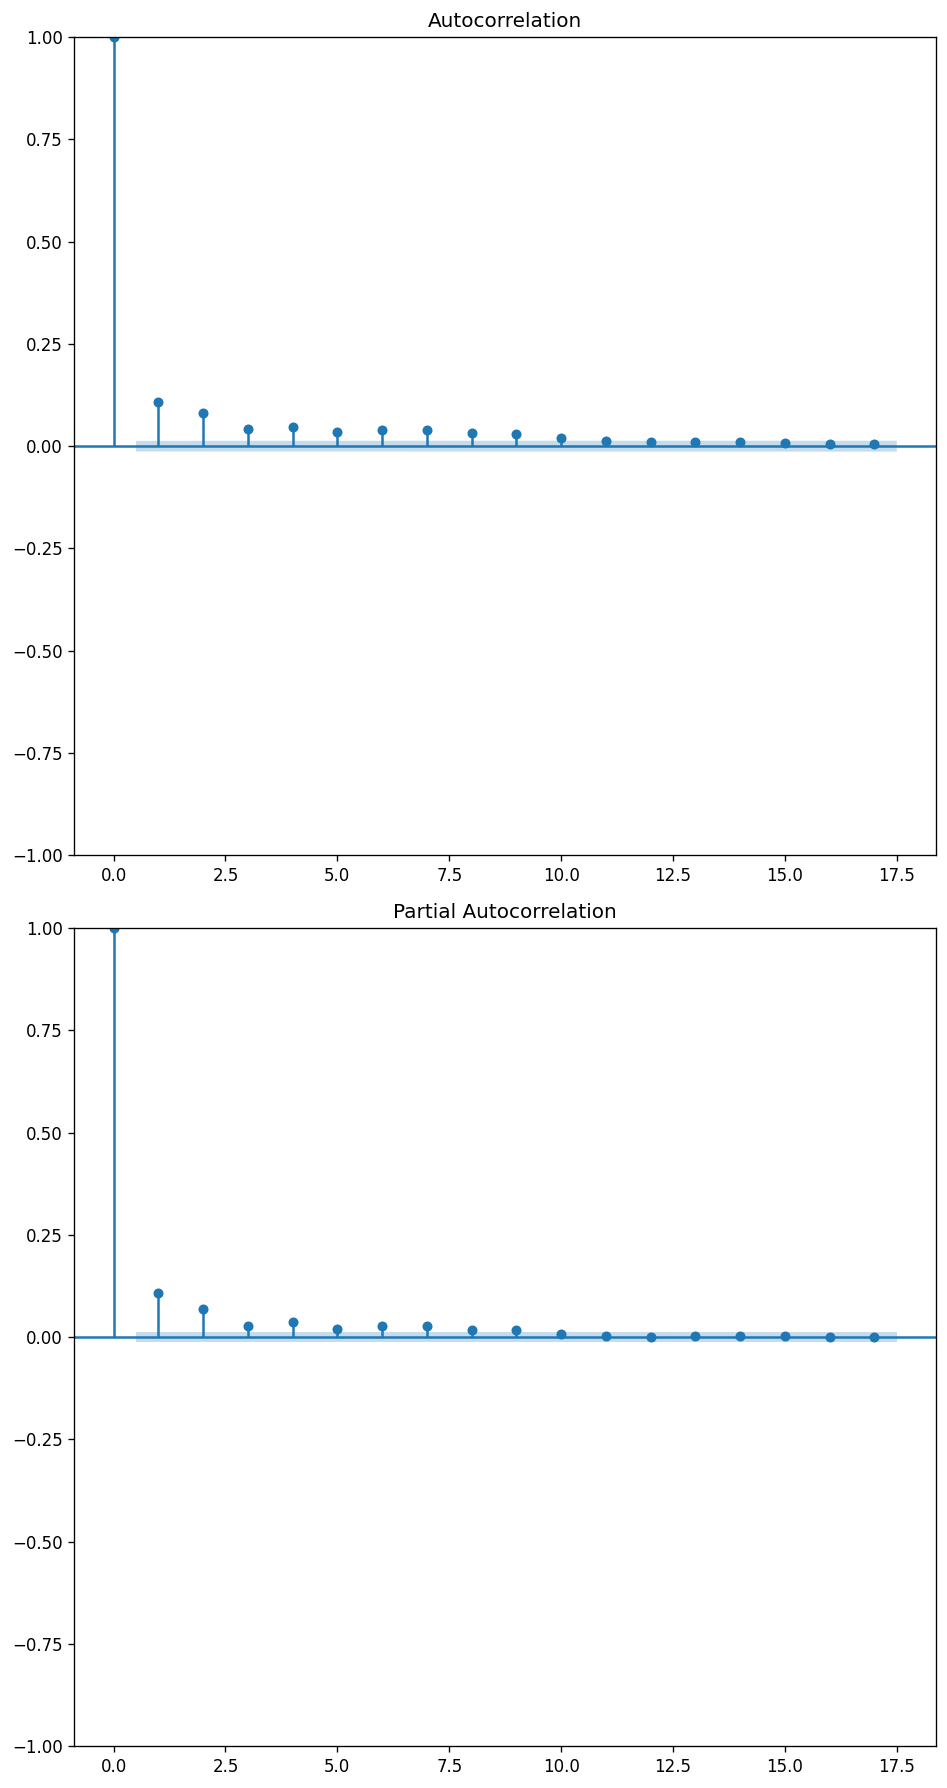

In [87]:
fig = plt.figure(figsize = (8, 15))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.value, lags = 17 , ax = ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.value, lags = 17 , ax = ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

In [100]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

df = pd.read_csv("/Users/kang/Desktop/Volume-Tranformer/quantity.csv")
df.columns = ['date', 'value']



model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=261612.615, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=255469.292, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=261610.615, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=253312.891, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=251980.180, Time=0.83 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=251220.383, Time=1.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=250631.638, Time=1.40 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=250195.802, Time=1.95 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=249901.716, Time=1.80 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=249665.092, Time=2.78 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=249508.479, Time=3.06 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=249392.723, Time=3.76 sec
 ARIMA(10,1,1)(0,0

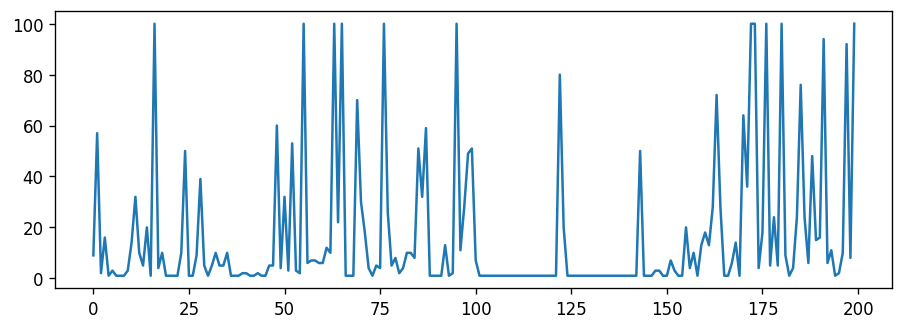

In [99]:
plt.plot(df.index[0:200], df.value[0:200], linestyle = '-')

# trading volume at best bid or best ask

In [101]:
data_path = "/Users/kang/Data/AMZN_2021-04-01_34200000_57600000_message_50.csv"
df = pd.read_csv(data_path)
message = df[df.iloc[:,1] == 4]

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/3608705881.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


In [111]:
message.columns = ['time','type','order_id','quantity','price','side','remark']
message

,time,type,order_id,quantity,price,side,remark
89,34201.238593,4,14152133,9,31179100,1,NaN
92,34201.238728,4,7096337,57,31177500,1,NaN
96,34201.252830,4,7970541,2,31175000,1,NaN
100,34201.292545,4,15695801,16,31176200,1,NaN
121,34201.302979,4,3032093,1,31180000,-1,NaN
...,...,...,...,...,...,...,...
476968,57599.537055,4,405420365,71,31610400,1,NaN
476978,57599.683115,4,405427445,10,31610300,1,NaN
476979,57599.683115,4,405298481,64,31610100,1,NaN
476990,57599.803359,4,405402061,100,31615500,-1,NaN


In [103]:
data_path = "/Users/kang/Desktop/Volume-Tranformer/AMZN_2021-04-01_34200000_57600000_orderbook_50.csv"
df = pd.read_csv(data_path)

In [113]:
df1 = df.iloc[:,[0,2]]
df1.columns =['best_ask','best_bid']
df1

,best_ask,best_bid
0,31180100,31161600
1,31190000,31161600
2,31190000,31161600
3,31190000,31161600
4,31190000,31161600
...,...,...
477014,31616900,31610100
477015,31616900,31610100
477016,31616900,31610800
477017,31616900,31610800


In [185]:
df2 = pd.merge(message, df1,left_index=True, right_index=True);df2 = df2.reset_index();df2 = df2.drop(['remark'],axis = 1);df2
# all(df2.price <= df2.best_ask), all(df2.price >= df2.best_bid)

,index,time,type,order_id,quantity,price,side,best_ask,best_bid
0,89,34201.238593,4,14152133,9,31179100,1,31180000,31177500
1,92,34201.238728,4,7096337,57,31177500,1,31180000,31175000
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000
...,...,...,...,...,...,...,...,...,...
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300
22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100
22950,476979,57599.683115,4,405298481,64,31610100,1,31615500,31610100
22951,476990,57599.803359,4,405402061,100,31615500,-1,31616900,31610100


In [186]:
df2['d1']= df2.quantity.diff();df2

,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1
0,89,34201.238593,4,14152133,9,31179100,1,31180000,31177500,NaN
1,92,34201.238728,4,7096337,57,31177500,1,31180000,31175000,48.0
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000,-55.0
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000,14.0
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000,-15.0
...,...,...,...,...,...,...,...,...,...,...
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300,-29.0
22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100,-61.0
22950,476979,57599.683115,4,405298481,64,31610100,1,31615500,31610100,54.0
22951,476990,57599.803359,4,405402061,100,31615500,-1,31616900,31610100,36.0


In [187]:
df2['d2'] = df2.d1.diff();df2 = df2.dropna();df2

,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1,d2
2,96,34201.252830,4,7970541,2,31175000,1,31180000,31175000,-55.0,-103.0
3,100,34201.292545,4,15695801,16,31176200,1,31180000,31175000,14.0,69.0
4,121,34201.302979,4,3032093,1,31180000,-1,31180000,31175000,-15.0,-29.0
5,122,34201.302979,4,5408853,3,31180000,-1,31180000,31175000,2.0,17.0
6,123,34201.302979,4,6759425,1,31180000,-1,31180000,31175000,-2.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...
22948,476968,57599.537055,4,405420365,71,31610400,1,31615200,31610300,-29.0,-32.0
22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100,-61.0,-32.0
22950,476979,57599.683115,4,405298481,64,31610100,1,31615500,31610100,54.0,115.0
22951,476990,57599.803359,4,405402061,100,31615500,-1,31616900,31610100,36.0,-18.0


/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/3802372507.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(df2.index[:1500], df2.quantity[:1500])


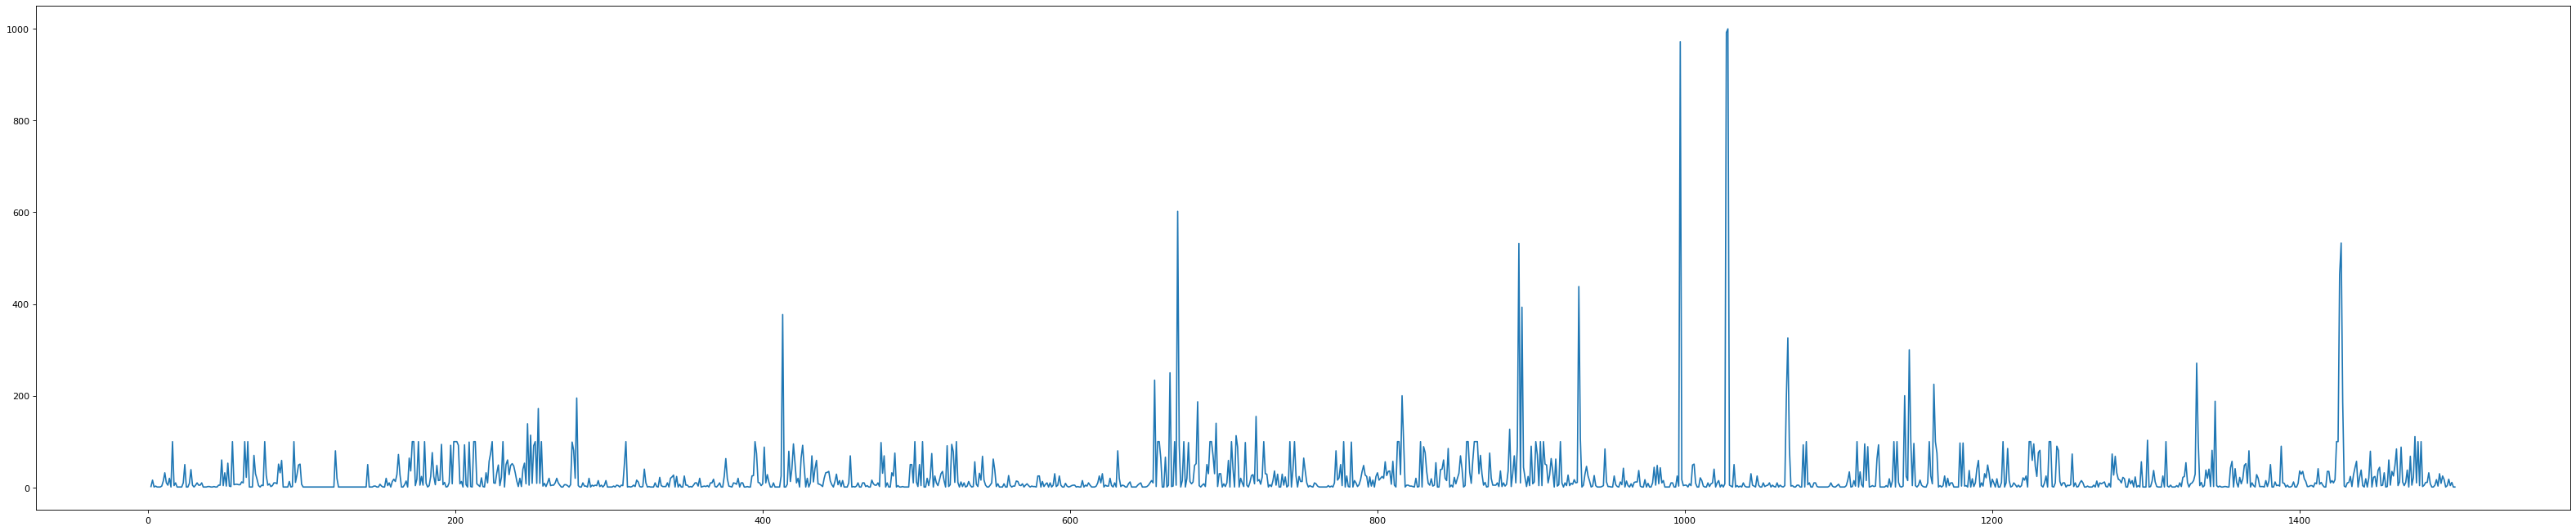

In [188]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(df2.index[:1500], df2.quantity[:1500])

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/1042775129.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(df2.index[:1500], df2.d1[:1500])


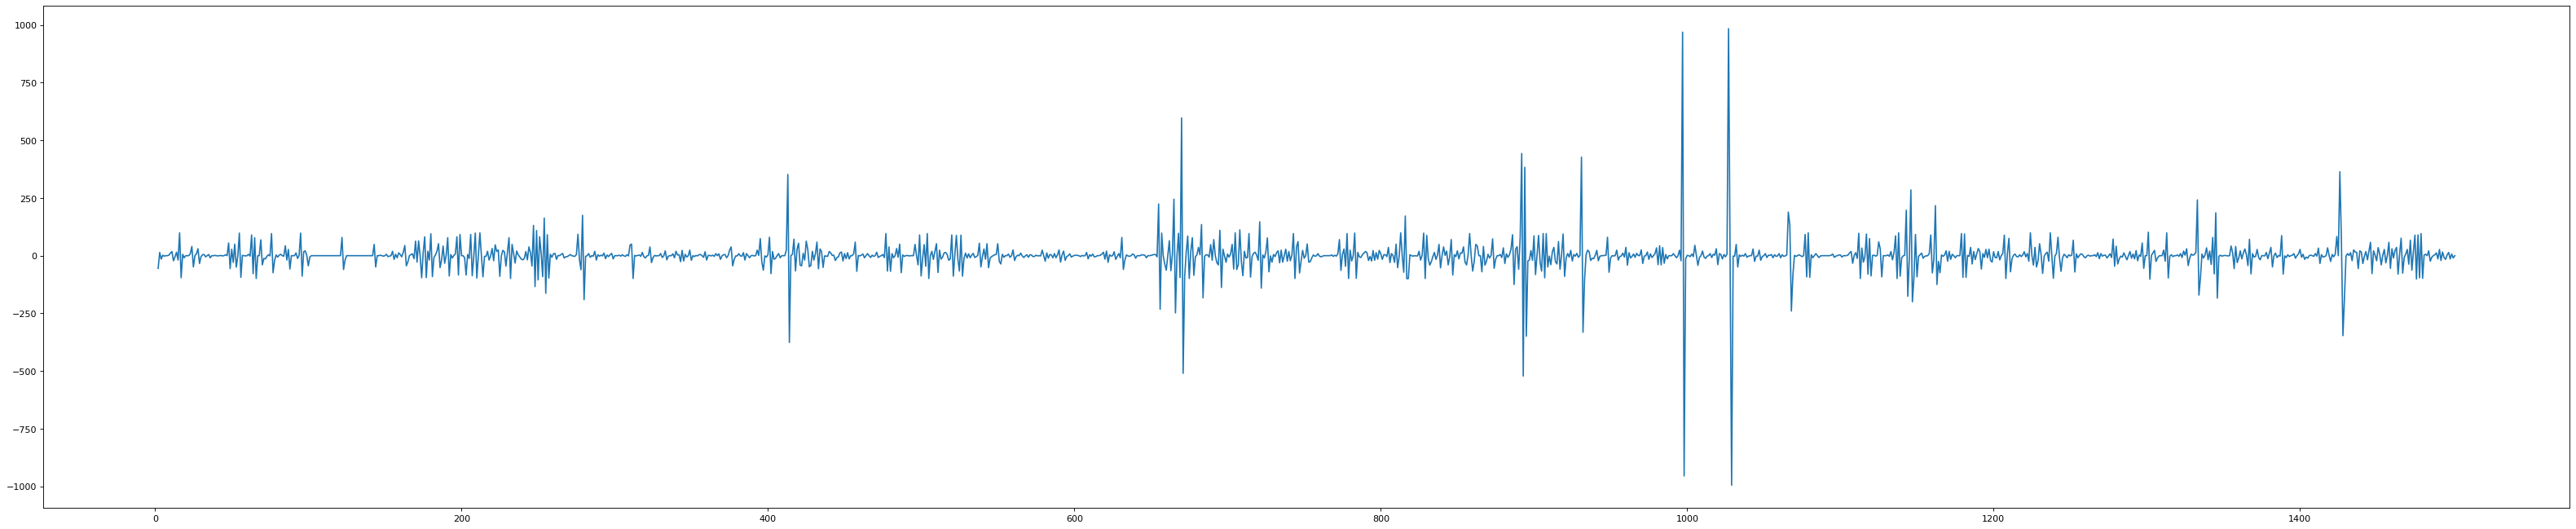

In [189]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(df2.index[:1500], df2.d1[:1500])

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/222614163.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(df2.index[:1500], df2.d2[:1500])


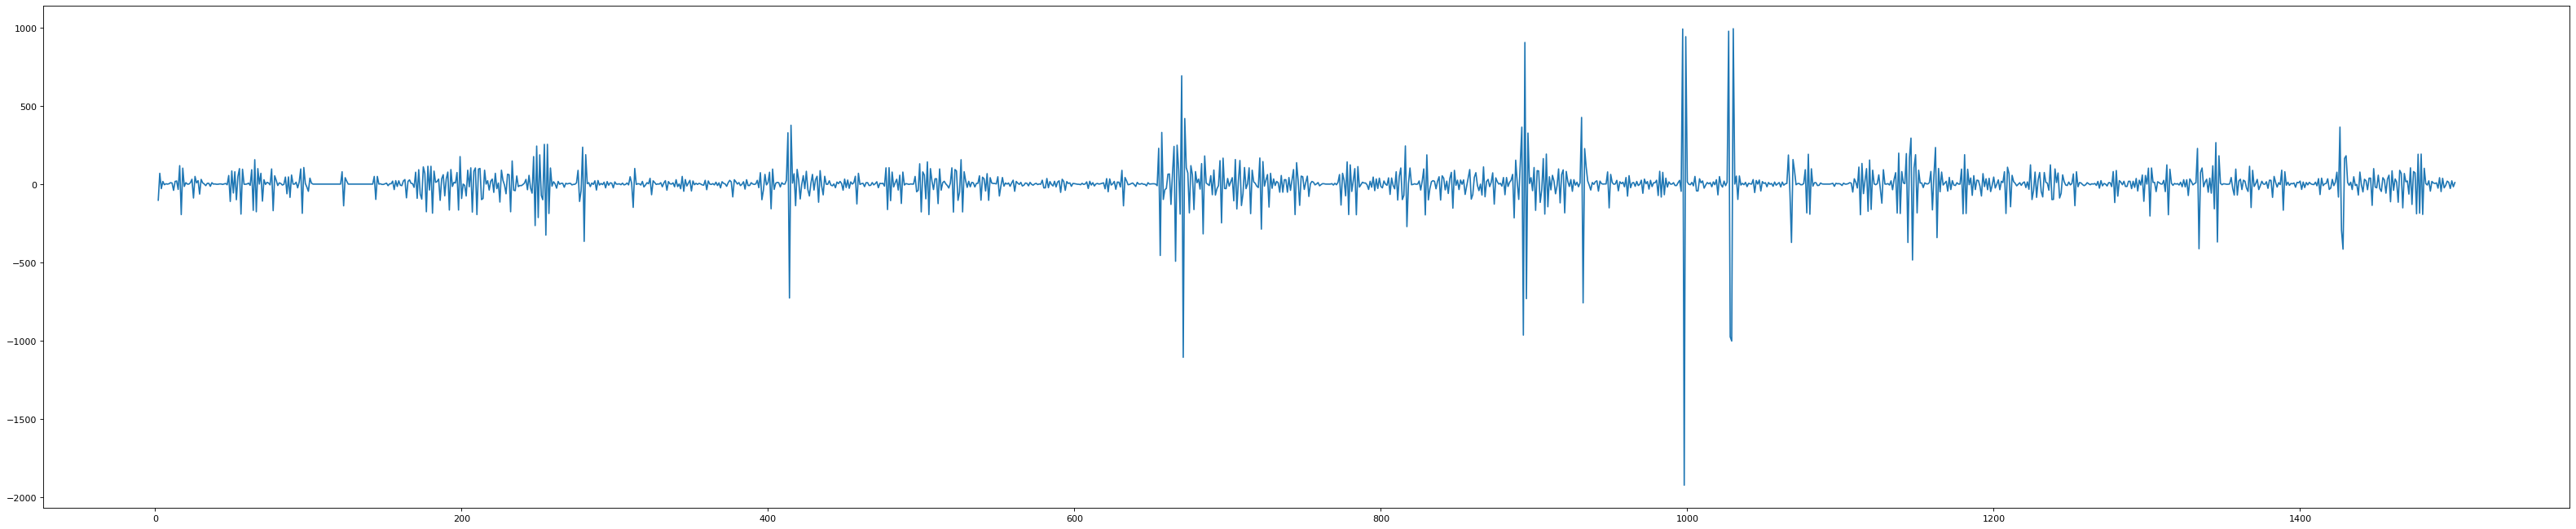

In [190]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(df2.index[:1500], df2.d2[:1500])

In [194]:
model = pm.auto_arima(df2.d1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=261599.776, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=255457.047, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=253300.771, Time=0.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=251968.160, Time=0.37 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=251208.414, Time=0.42 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=250619.705, Time=0.60 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=250183.894, Time=0.72 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=249889.825, Time=0.78 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=249653.213, Time=0.86 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=249496.605, Time=1.02 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=249380.850, Time=1.33 sec
 ARIMA(11,0,0)(0,0,0)[0]             : AIC=249283.827, Time=1.40 sec
 ARIMA(12,0,0)(0,

In [252]:
small =  df2[df2.quantity<=10];small
small['d1']= small.quantity.diff();small
small['d2'] = small.d1.diff();small = small.dropna();small
small = small.reset_index();small

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/1768138324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['d1']= small.quantity.diff();small
/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/1768138324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['d2'] = small.d1.diff();small = small.dropna();small


,level_0,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1,d2
0,5,122,34201.302979,4,5408853,3,31180000,-1,31180000,31175000,2.0,3.0
1,6,123,34201.302979,4,6759425,1,31180000,-1,31180000,31175000,-2.0,-4.0
2,7,125,34201.305281,4,6759425,1,31180000,-1,31180000,31175000,0.0,2.0
3,8,126,34201.305281,4,7261209,1,31180000,-1,31180000,31175000,0.0,0.0
4,9,127,34201.305283,4,7261209,3,31180000,-1,31180000,31175000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14903,22929,476828,57597.544589,4,405235357,3,31609900,1,31616900,31609900,0.0,-2.0
14904,22932,476849,57597.718451,4,405254957,2,31615200,-1,31616900,31610100,-1.0,-1.0
14905,22945,476965,57599.532084,4,405395101,3,31610400,1,31615200,31610400,1.0,2.0
14906,22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100,7.0,6.0


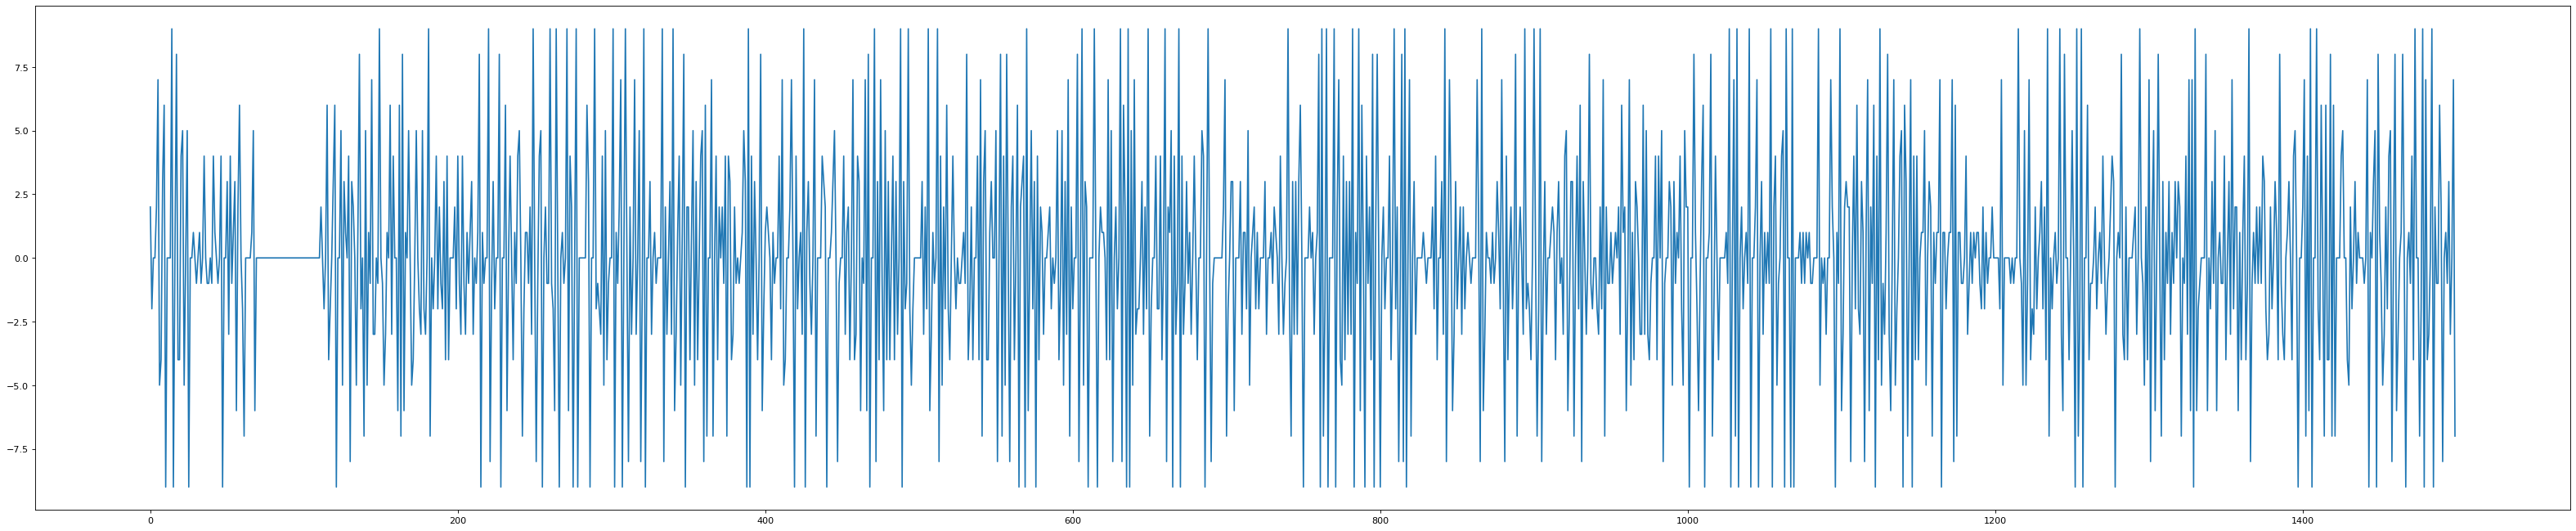

In [253]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
# plt.plot(small.index[:1500], small.quantity[:1500])
plt.plot(small.index[:1500], small.d1[:1500])


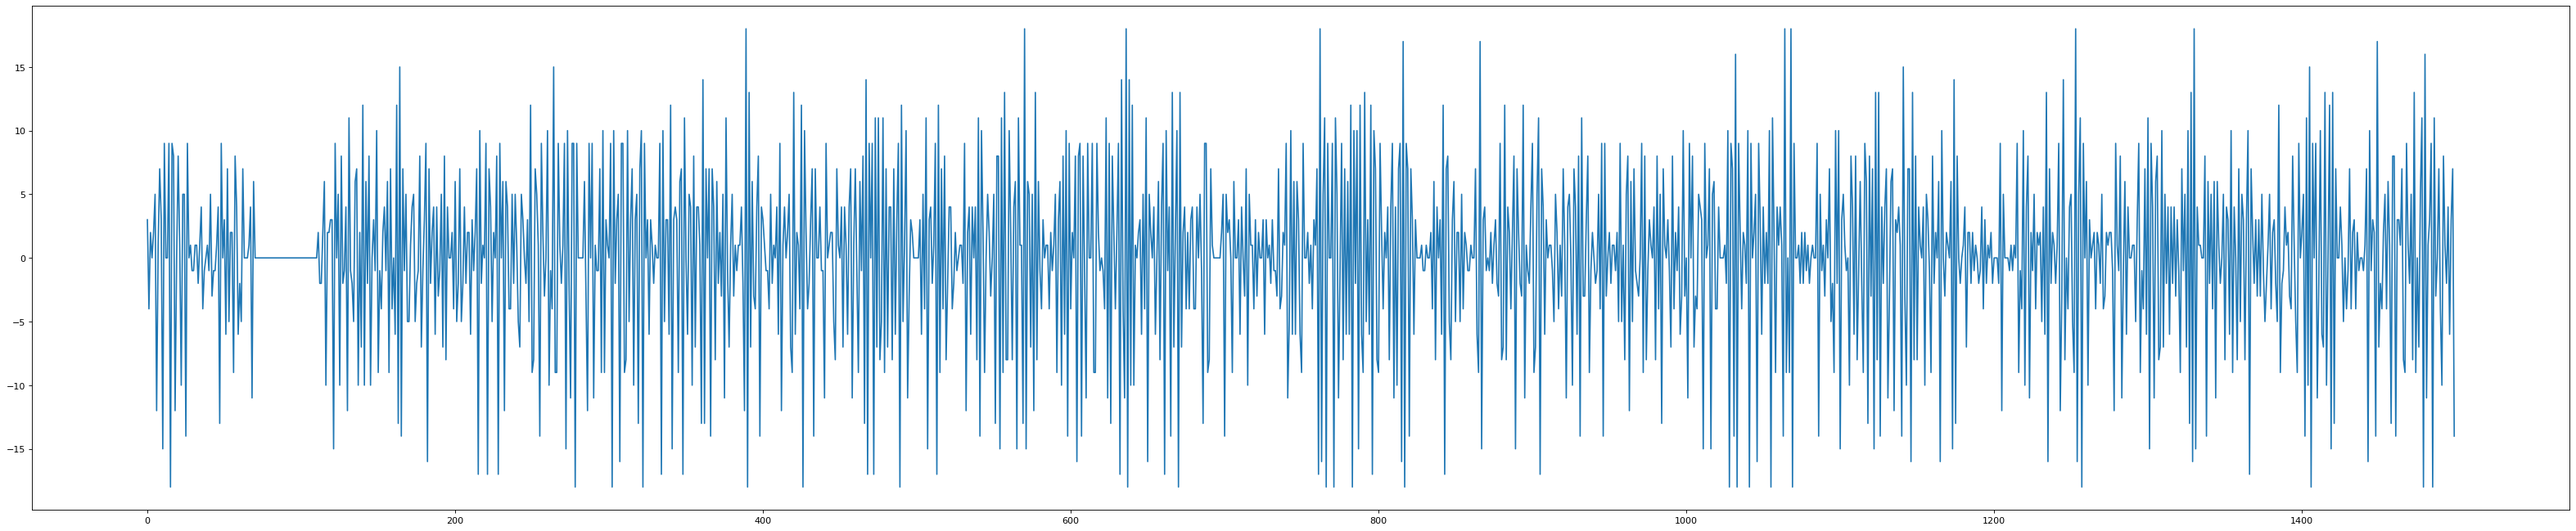

In [254]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(small.index[:1500], small.d2[:1500])

In [262]:
small_train = small.iloc[:14000,:];small_train

,level_0,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1,d2
0,5,122,34201.302979,4,5408853,3,31180000,-1,31180000,31175000,2.0,3.0
1,6,123,34201.302979,4,6759425,1,31180000,-1,31180000,31175000,-2.0,-4.0
2,7,125,34201.305281,4,6759425,1,31180000,-1,31180000,31175000,0.0,2.0
3,8,126,34201.305281,4,7261209,1,31180000,-1,31180000,31175000,0.0,0.0
4,9,127,34201.305283,4,7261209,3,31180000,-1,31180000,31175000,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13995,21342,457831,57190.725410,4,379476521,1,31614700,-1,31614800,31611200,0.0,0.0
13996,21344,457846,57190.727461,4,380926161,4,31615600,-1,31615900,31609000,3.0,3.0
13997,21345,457847,57190.728571,4,355807165,5,31615900,-1,31616100,31609000,1.0,-2.0
13998,21346,457940,57192.522860,4,388867005,4,31615700,-1,31615800,31603700,-1.0,-2.0


In [263]:
small_test = small.iloc[14000:,:];small_test

,level_0,index,time,type,order_id,quantity,price,side,best_ask,best_bid,d1,d2
14000,21352,457964,57192.556140,4,380676205,1,31617200,-1,31617500,31613400,0.0,3.0
14001,21353,457967,57192.558365,4,383956945,1,31617500,-1,31617800,31613400,0.0,0.0
14002,21354,457969,57192.559737,4,388676309,1,31617800,-1,31617800,31613400,0.0,0.0
14003,21356,458033,57195.204421,4,388676309,4,31617800,-1,31618500,31612100,3.0,3.0
14004,21357,458183,57200.316039,4,389087041,1,31617600,-1,31618500,31613800,-3.0,-6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14903,22929,476828,57597.544589,4,405235357,3,31609900,1,31616900,31609900,0.0,-2.0
14904,22932,476849,57597.718451,4,405254957,2,31615200,-1,31616900,31610100,-1.0,-1.0
14905,22945,476965,57599.532084,4,405395101,3,31610400,1,31615200,31610400,1.0,2.0
14906,22949,476978,57599.683115,4,405427445,10,31610300,1,31615500,31610100,7.0,6.0


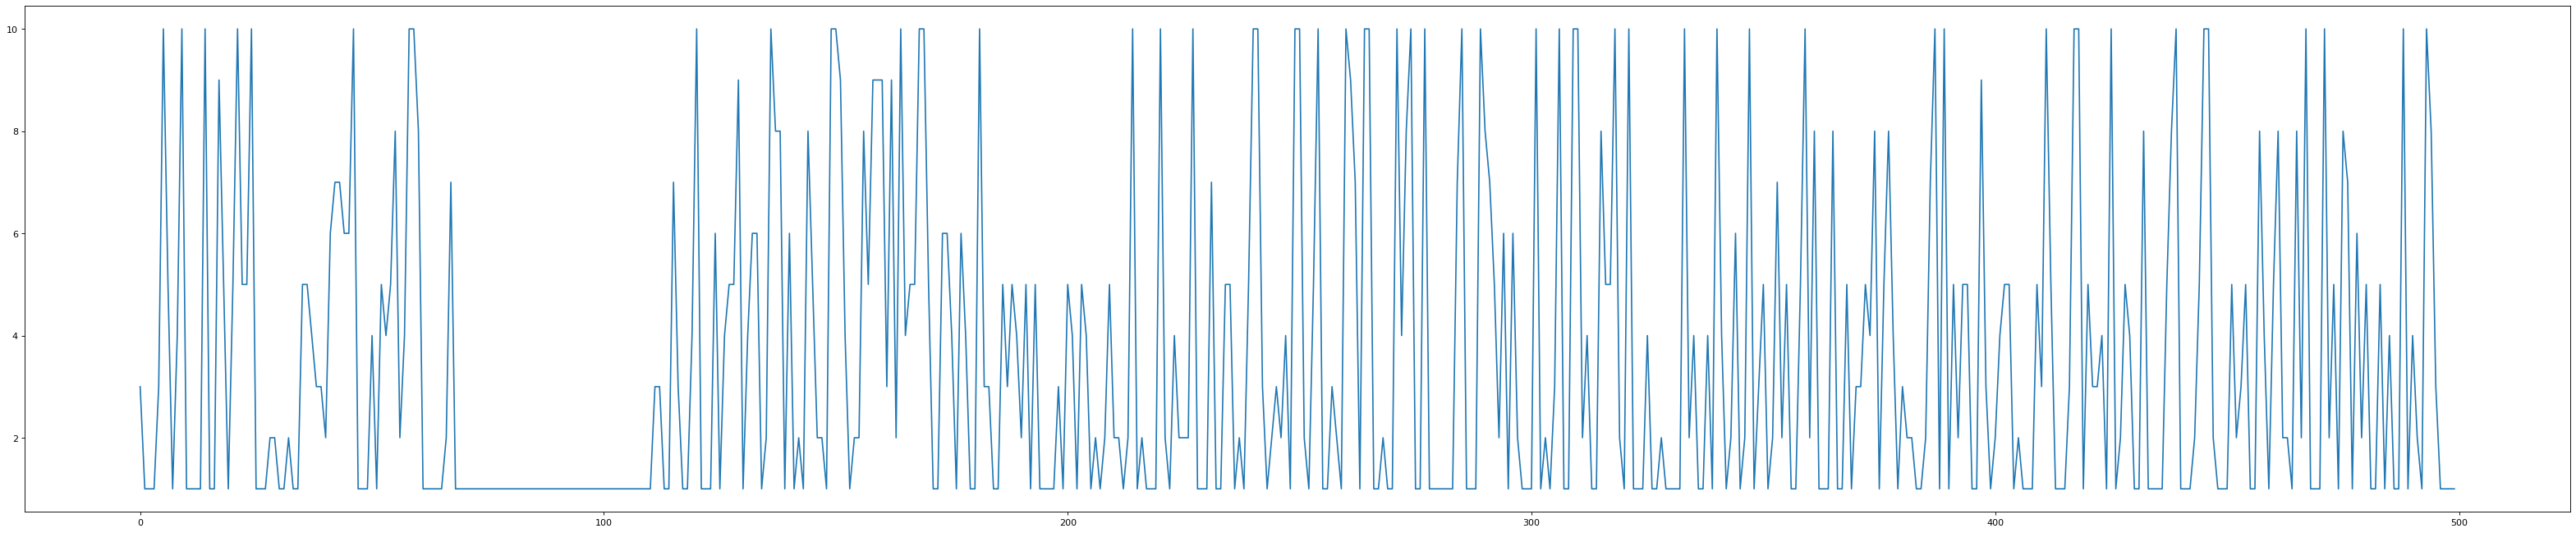

In [269]:
from matplotlib.pyplot import figure
figure(figsize=(50, 10), dpi=80)
plt.plot(small_train.index[:500], small_train.quantity[:500])

In [270]:
model = pm.auto_arima(small_train.quantity , start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=8, max_q=8, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=77715.970, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=74009.154, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=77713.970, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=72546.632, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=71771.799, Time=0.45 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=71193.636, Time=0.75 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=70878.158, Time=1.32 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=70640.883, Time=1.72 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=70458.906, Time=1.28 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=70274.802, Time=2.00 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=17.94 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=15.26 sec
 ARIMA(8,1,0)(0,0,0)[0]             : AIC

In [271]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                14000
Model:               SARIMAX(8, 1, 0)   Log Likelihood              -35127.401
Date:                Tue, 08 Nov 2022   AIC                          70272.802
Time:                        05:55:08   BIC                          70340.722
Sample:                             0   HQIC                         70295.413
                              - 14000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8322      0.008   -104.625      0.000      -0.848      -0.817
ar.L2         -0.7072      0.010    -67.375      0.000      -0.728      -0.687
ar.L3         -0.6004      0.012    -50.697      0.000      -0.624      -0.577
ar.L4         -0.5055      0.012    -40.627      0.000      -0.530      -0.481
ar.L5         -0.3913      0.012    -31.492      0.000      -0.416      -0.367
ar.L6         -0.3005      0.012    -25.369      0.000      -0.324      -0.277
ar.L7         -0.2084      0.011    -19.688      0.000      -0.229      -0.188
ar.L8         -0.1149      0.008    -13.891      0.000      -0.131      -0.099
sigma2         8.8514      0.102     86.643      0.000       8.651       9.052
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):              1959.47
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.91
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [300]:
from sklearn.metrics import r2_score
length = 50
predicted = pd.DataFrame(model.predict(n_periods=length))
r2_score(small_test.quantity[0:length],predicted.iloc[:length,0])

/var/folders/wm/hz1dg7s12290bq4v0lkczywc0000gn/T/ipykernel_7832/2280451930.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  r2_score(small_test.quantity[0:length],predicted.iloc[:length,0])


-0.016879506253745458

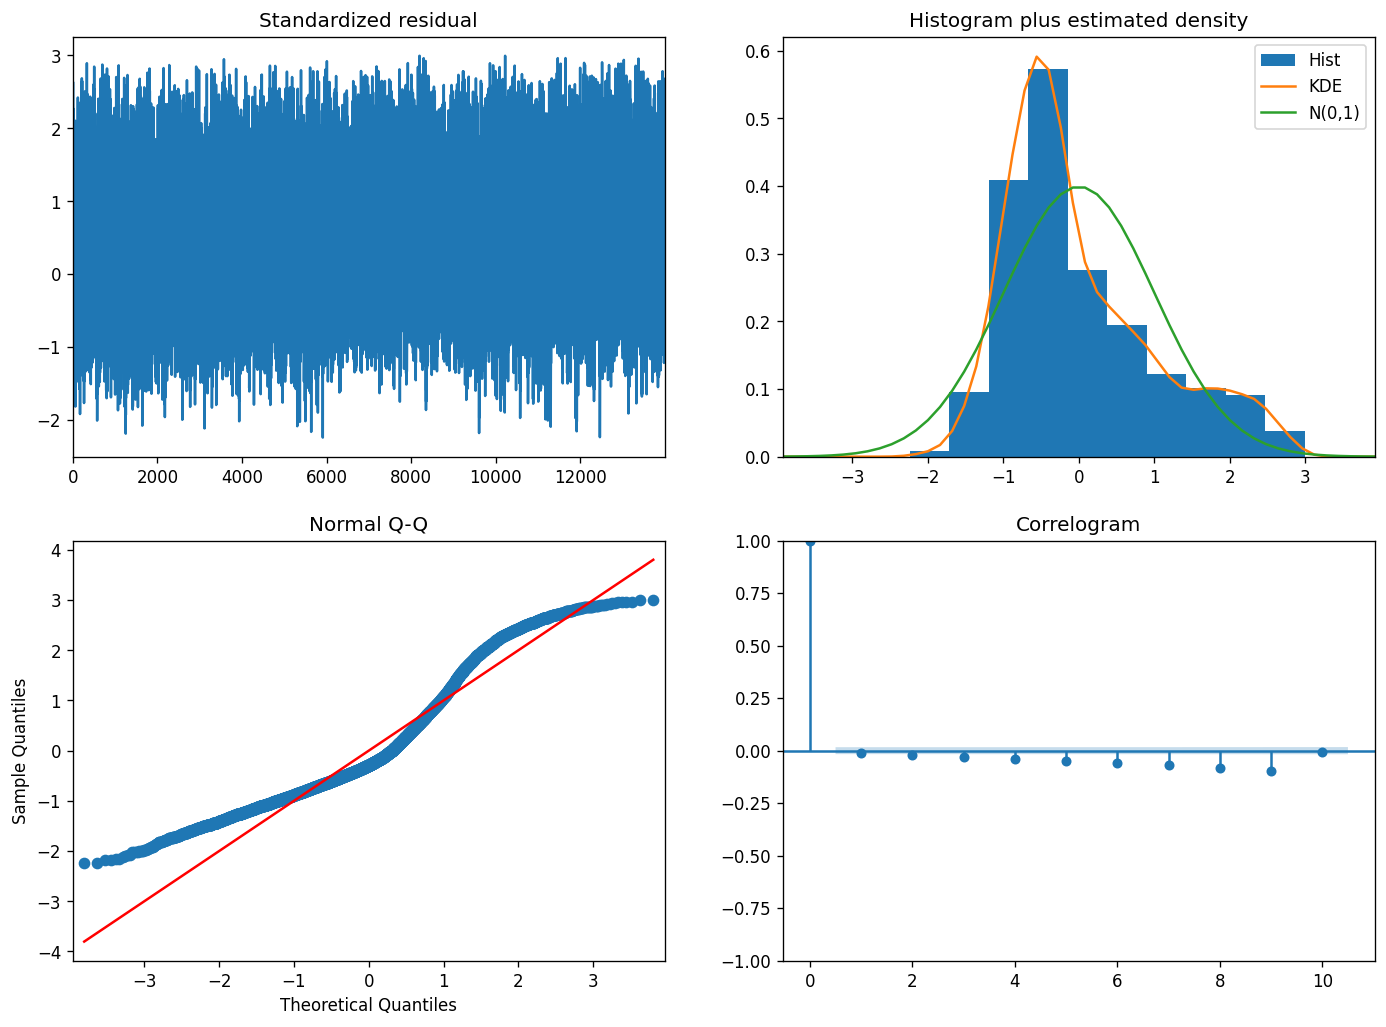

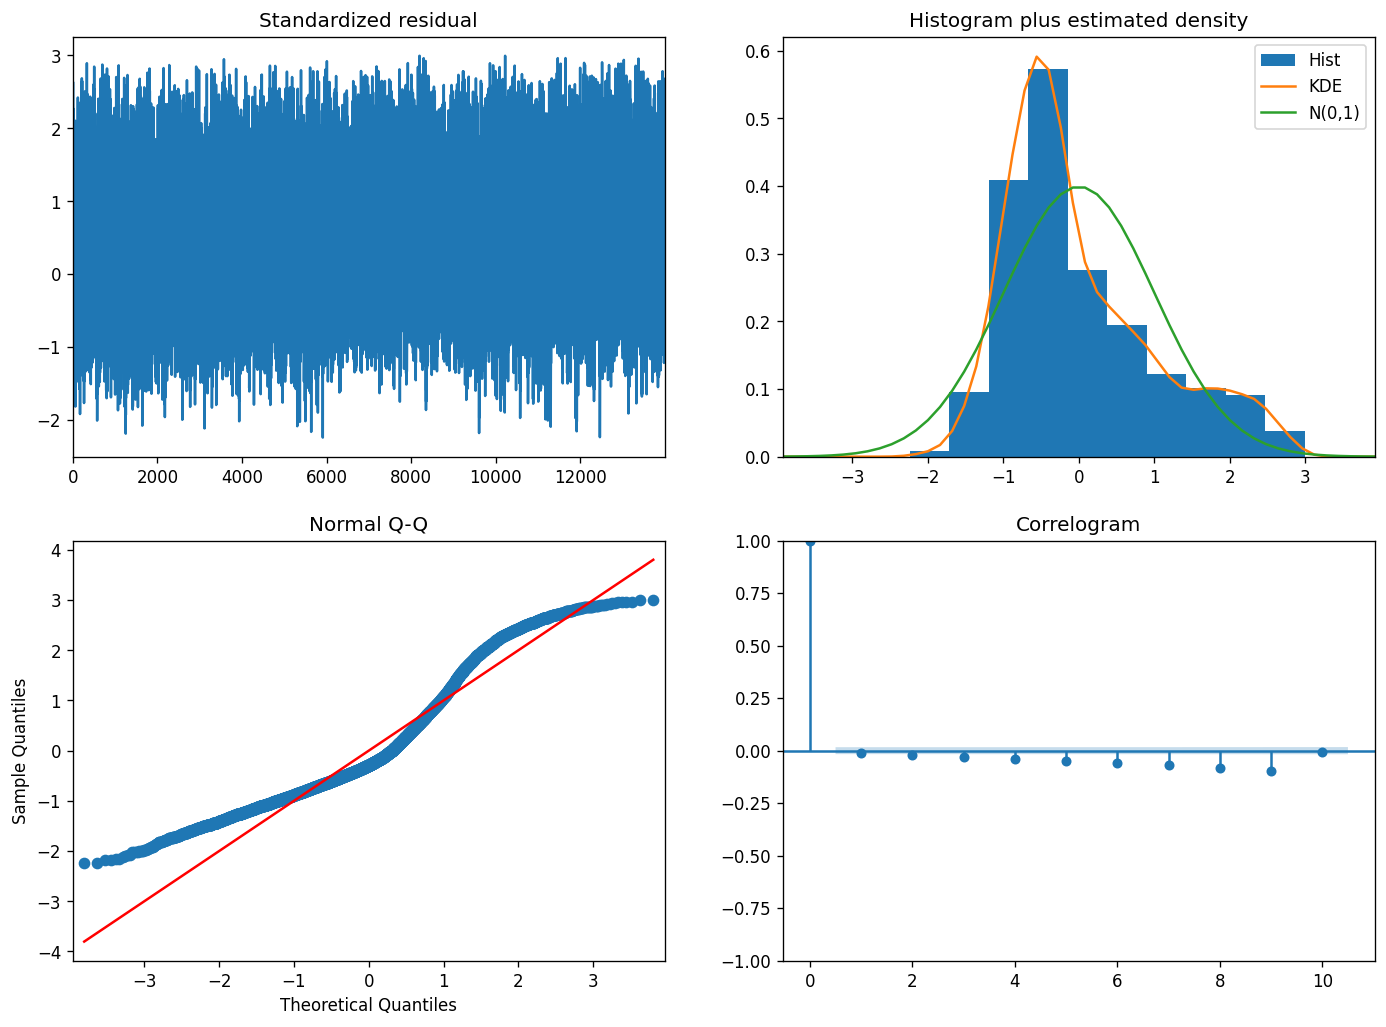

In [301]:
model.plot_diagnostics(figsize=(14,10))